<a href="https://www.kaggle.com/code/gpreda/ocular-disease-recognition-eda?scriptVersionId=128046727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction


This is an exploratory data analysis (EDA) Notebook for Ocular Disease Recognition dataset.

Annotations were added by trained human readers with quality control management. They classify patient into eight labels including:

* Normal (N);  
* Diabetes (D);  
* Glaucoma (G);  
* Cataract (C);  
* AMD (A);  
* Hypertension (H);  
* Myopia (M);
* Other diseases/abnormalities (O)  



# Data preparation


## Load packages

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

## Explore data sources

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/ocular-disease-recognition-odir5k
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images
/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K
/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K
/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Testing Images
/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images


We have multiple folders, let's look first in the main folder.

Here we have train, test images and an Excel file. Let's start with the Excel file.


## Load tabelar data (Excel)

In [3]:
!pip install openpyxl

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
data_df = pd.read_excel("/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/data.xlsx", engine="openpyxl")  

In [5]:
data_df.head()

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   3           66        Male  3_left.jpg  3_right.jpg   
4   4           53        Male  4_left.jpg  4_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  
0                           normal fundus  0  0  0  1  0  0  0  0  
1                           normal fundus  1  0  0  0  0  0  0  0  
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1  
3         branch retinal artery occlusion  0  0  0  0  0  0  0  1  
4       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1

We will change the labels for the columns so it will be easier to process.

In [6]:
data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

# Data exploration



## Check tabelar data

In [7]:
data_df.head()

id  age     sex left_fundus right_fundus  \
0   0   69  Female  0_left.jpg  0_right.jpg   
1   1   57    Male  1_left.jpg  1_right.jpg   
2   2   42    Male  2_left.jpg  2_right.jpg   
3   3   66    Male  3_left.jpg  3_right.jpg   
4   4   53    Male  4_left.jpg  4_right.jpg   

                                      left_diagnosys  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                          right_diagnosys  normal  diabetes  glaucoma  \
0                           normal fundus       0         0         0   
1                           normal fundus       1         0         0   
2  moderate non proliferative retinopathy       0         1         0   
3         branch retinal artery occlusion       0         0         0   
4       mild nonproliferative retinopathy       0         1         0   

   cataract  amd  hypertension  myopia  other  
0         1    0             0       0      0  
1         0    0             0       0      0  
2         0    0             0       0      1  
3         0    0             0       0      1  
4         0    0             0       0      1

In [8]:
print(f"data shape: {data_df.shape}")
print(f"left fundus: {data_df.left_fundus.nunique()}")
print(f"right fundus: {data_df.right_fundus.nunique()}")

data shape: (3500, 15)
left fundus: 3500
right fundus: 3500


We have 3500 records, and unique images associated with each record for left and respectively right eye.

## Check image data


We check now the image data for completeness.

In [9]:
print(f"train images: {len(os.listdir('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Training Images'))}")
print(f"test images: {len(os.listdir('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Testing Images'))}")
print(f"train images - left eye: {len(glob.glob('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Training Images//*_left.jpg'))}")
print(f"train images - right eye: {len(glob.glob('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Training Images//*_right.jpg'))}")
print(f"test images - left eye: {len(glob.glob('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Testing Images//*_left.jpg'))}")
print(f"test images - right eye: {len(glob.glob('//kaggle//input//ocular-disease-recognition-odir5k//ODIR-5K//ODIR-5K//Testing Images//*_right.jpg'))}")

train images: 7000
test images: 1000
train images - left eye: 3500
train images - right eye: 3500
test images - left eye: 500
test images - right eye: 500


There are 7000 images in training set and 1000 images in testing set, with half of them for left eye and half of them for right eye.

Since there is only one flag for each patology, and we have same record for both eyes for each patient, we will need to infer from the left diagnosys, respectively from right diagnosis, to which eye reffers the flag.

For example, for patient with id `0` (Female, age 69), there is a flag `1` for **cataract**. Looking to the **left_diagnosys** and **right_diagnosys**, we observe that only for left_diagnosys we have cataract marked. Consequently, if we want to train a model to recognize cataract, we will only label left eye (image `0_left.png` as being with **cataract** flag 1.

## Data distribution

In [10]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))
    plt.show()    

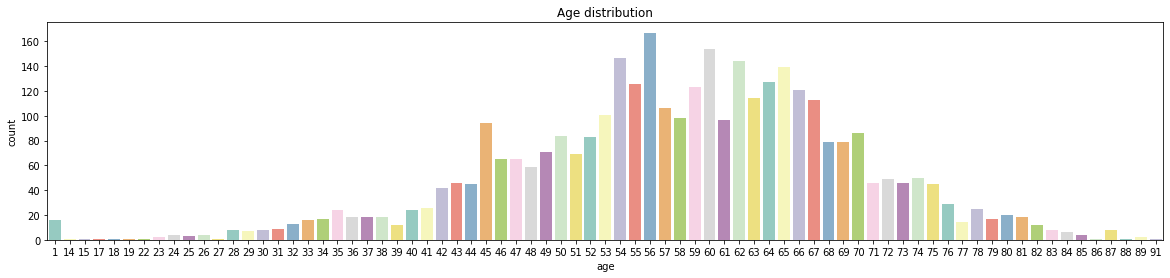

In [11]:
plot_count("age", "Age", data_df, size=5, show_all=True)

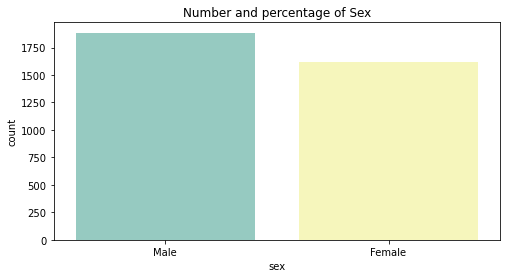

In [12]:
plot_count("sex", "Sex", data_df, size=2)

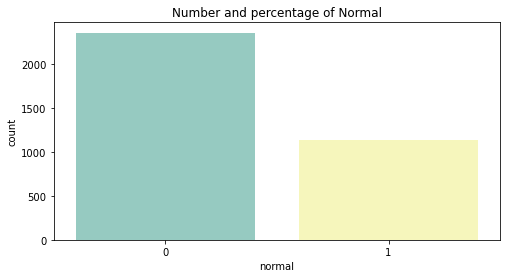

In [13]:
plot_count("normal", "Normal", data_df, size=2)

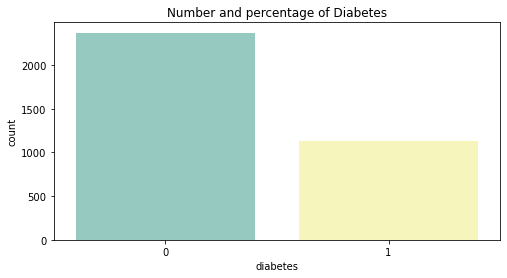

In [14]:
plot_count("diabetes", "Diabetes", data_df, size=2)

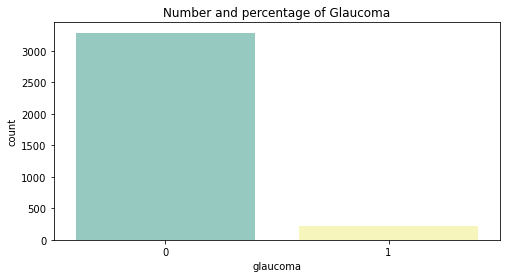

In [15]:
plot_count("glaucoma", "Glaucoma", data_df, size=2)

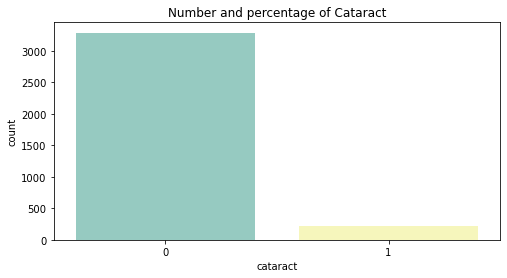

In [16]:
plot_count("cataract", "Cataract", data_df, size=2)

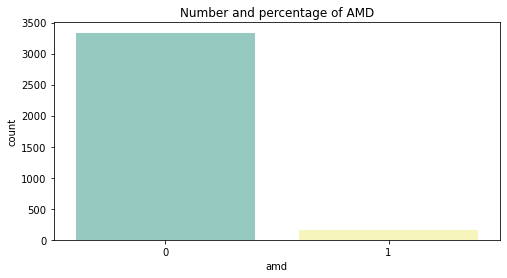

In [17]:
plot_count("amd", "AMD", data_df, size=2)

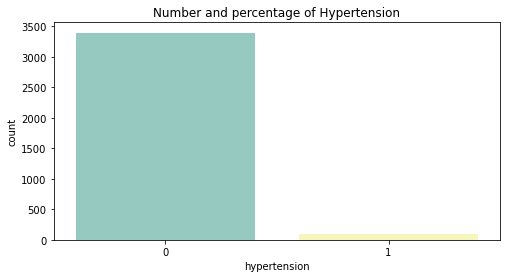

In [18]:
plot_count("hypertension", "Hypertension", data_df, size=2)

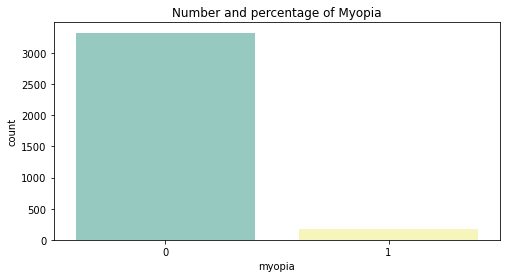

In [19]:
plot_count("myopia", "Myopia", data_df, size=2)

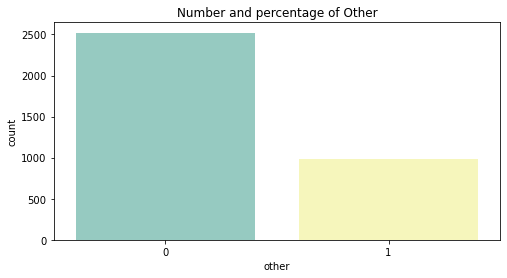

In [20]:
plot_count("other", "Other", data_df, size=2)

Let's verify now the distribution of comments associated with the left and right eye.

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


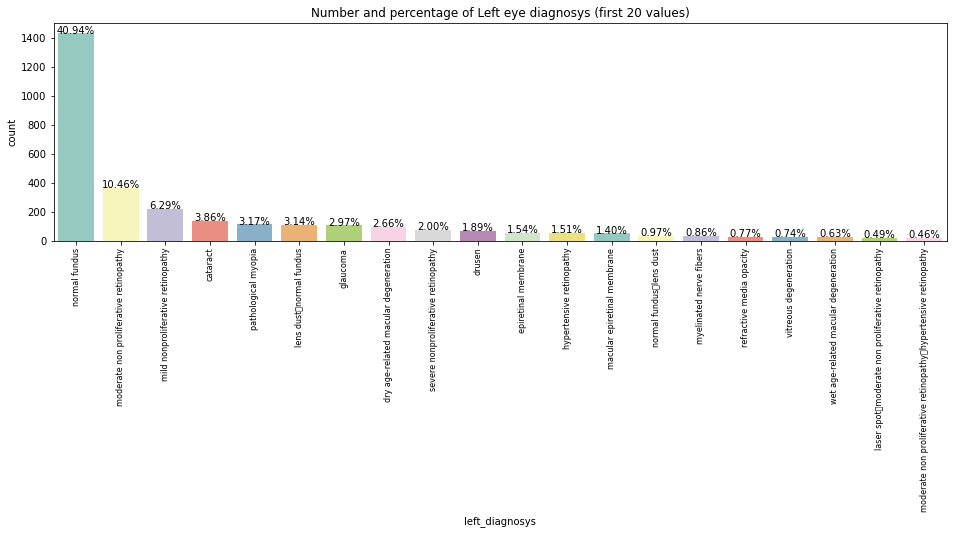

In [21]:
plot_count("left_diagnosys", "Left eye diagnosys (first 20 values)", data_df, size=4)

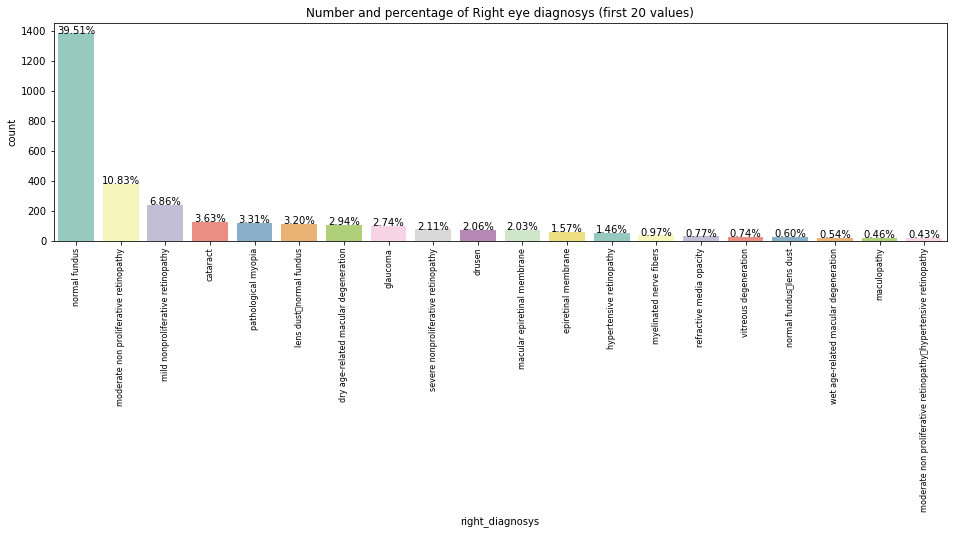

In [22]:
plot_count("right_diagnosys", "Right eye diagnosys (first 20 values)", data_df, size=4)

Let's check now frequence of words used in diagnosys for left and right eye, as a wordcloud, to see what are the most frequent words used in such diagnosys.

In [23]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=40,
        max_font_size=40, 
        scale=3,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

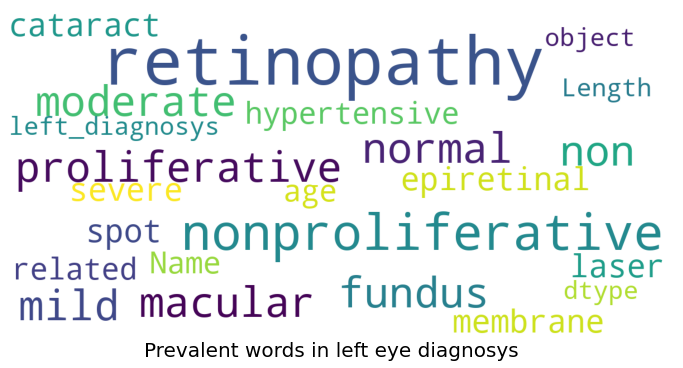

In [24]:
show_wordcloud(data_df['left_diagnosys'], title = 'Prevalent words in left eye diagnosys')

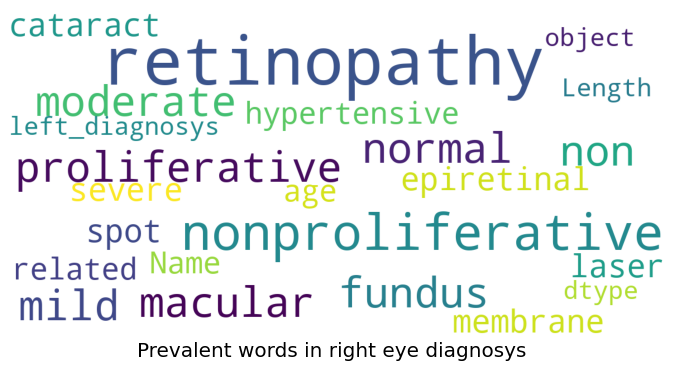

In [25]:
show_wordcloud(data_df['left_diagnosys'], title = 'Prevalent words in right eye diagnosys')

We can observe that the words used in diagnosys are quite balanced from the point of view of the two eyes.  


Let's look now to people with cataract and check what are the associated texts for left and right diagnosys,



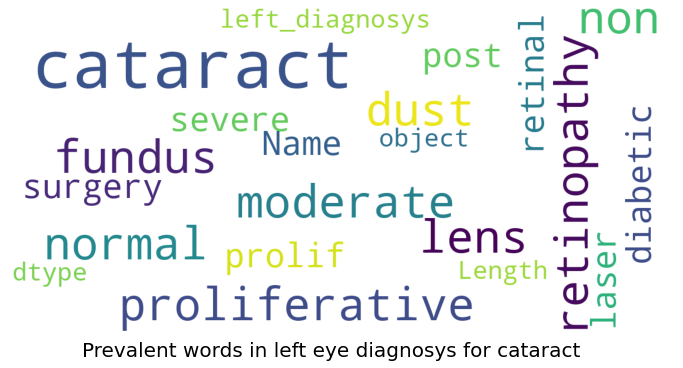

In [26]:
cataract_df = data_df.loc[data_df.cataract == 1]
show_wordcloud(cataract_df['left_diagnosys'], title = 'Prevalent words in left eye diagnosys for cataract')

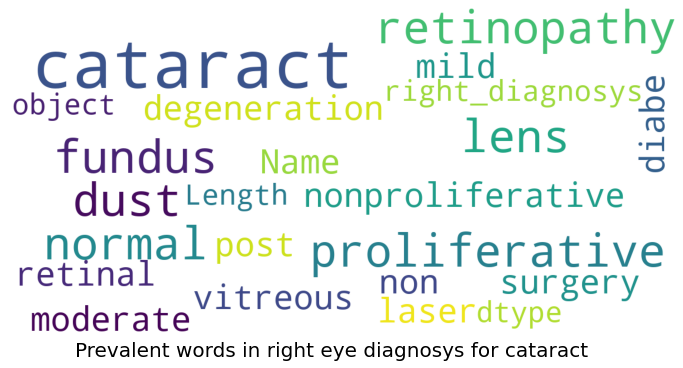

In [27]:
show_wordcloud(cataract_df['right_diagnosys'], title = 'Prevalent words in right eye diagnosys for cataract')

In [28]:
def plot_feature_distribution_grouped(feature, title, df, hue, size=4):
    plt.figure(figsize=(size*5,size*2))
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    g = sns.countplot(df[feature], hue=df[hue], palette='Set3')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

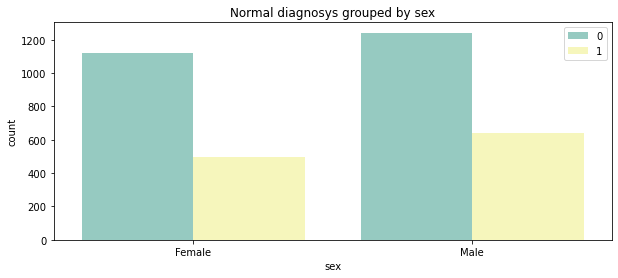

In [29]:
plot_feature_distribution_grouped('sex', 'Normal diagnosys grouped by sex', data_df, 'normal', size=2)

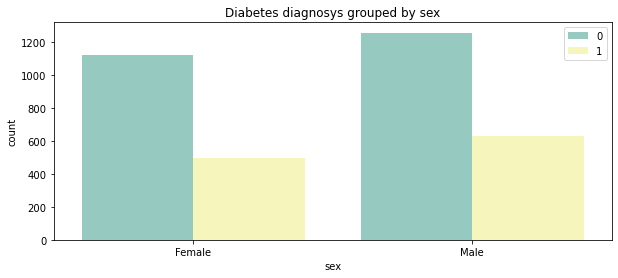

In [30]:
plot_feature_distribution_grouped('sex', 'Diabetes diagnosys grouped by sex', data_df, 'diabetes', size=2)

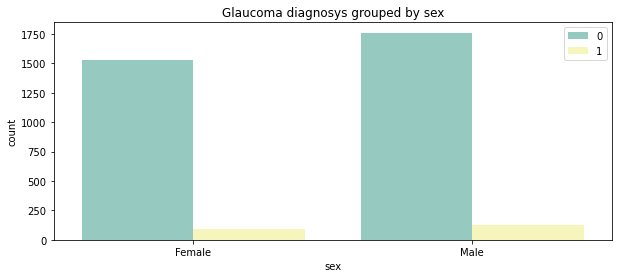

In [31]:
plot_feature_distribution_grouped('sex', 'Glaucoma diagnosys grouped by sex', data_df, 'glaucoma', size=2)

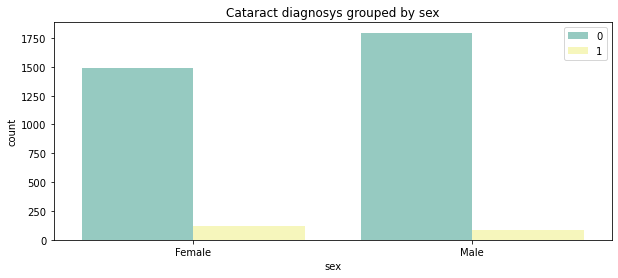

In [32]:
plot_feature_distribution_grouped('sex', 'Cataract diagnosys grouped by sex', data_df, 'cataract', size=2)

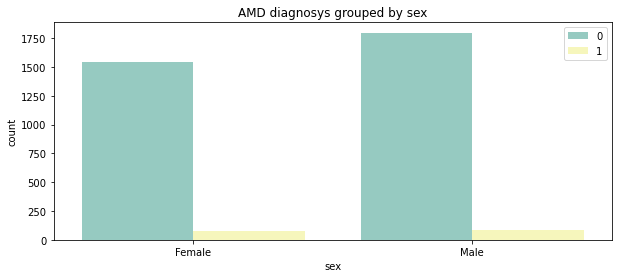

In [33]:
plot_feature_distribution_grouped('sex', 'AMD diagnosys grouped by sex', data_df, 'amd', size=2)

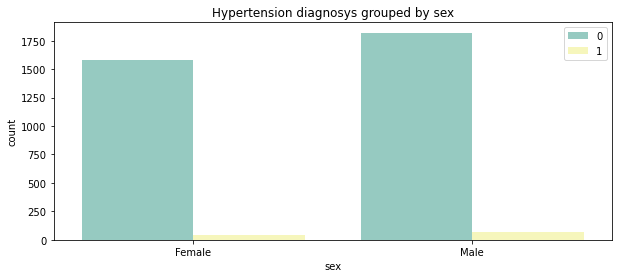

In [34]:
plot_feature_distribution_grouped('sex', 'Hypertension diagnosys grouped by sex', data_df, 'hypertension', size=2)

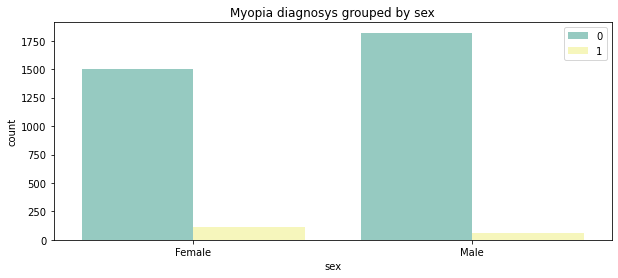

In [35]:
plot_feature_distribution_grouped('sex', 'Myopia diagnosys grouped by sex', data_df, 'myopia', size=2)

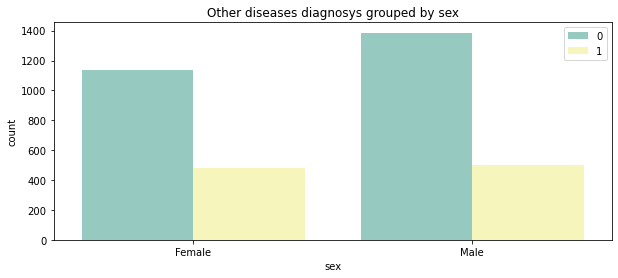

In [36]:
plot_feature_distribution_grouped('sex', 'Other diseases diagnosys grouped by sex', data_df, 'other', size=2)

## Images inspection

Let's inspect the images.

### Left-eye and right-eye cataract

In [37]:
import imageio
IMAGE_PATH = "/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images"
def show_images(df, title="Diagnosys", eye_exam="left_fundus"):
    print(f"{title}; eye exam: {eye_exam}")
    f, ax = plt.subplots(4,4, figsize=(16,16))
    for i,idx in enumerate(df.index):
        dd = df.iloc[idx]
        image_name = dd[eye_exam]
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data=imageio.imread(image_path)
        ax[i//4, i%4].imshow(img_data)
        ax[i//4, i%4].axis('off')
    plt.show()

Left eye with cataract; eye exam: left_fundus


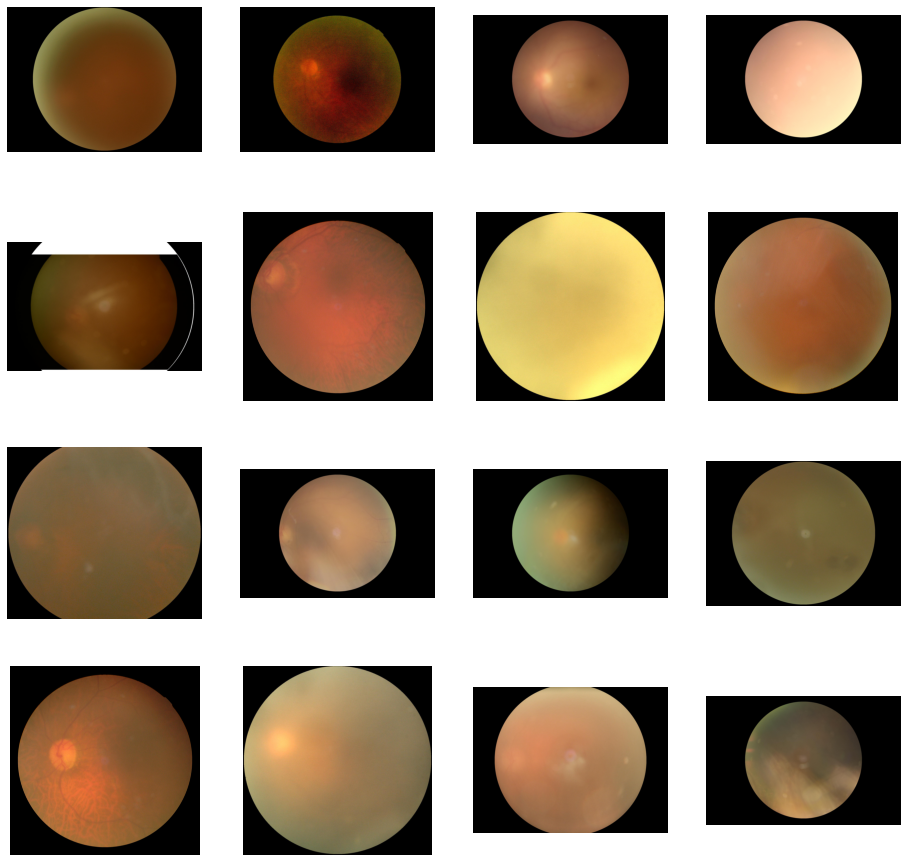

In [38]:
df = data_df.loc[(data_df.cataract==1) & (data_df.left_diagnosys=="cataract")].sample(16).reset_index()
show_images(df,title="Left eye with cataract",eye_exam="left_fundus")

Right eye with cataract; eye exam: right_fundus


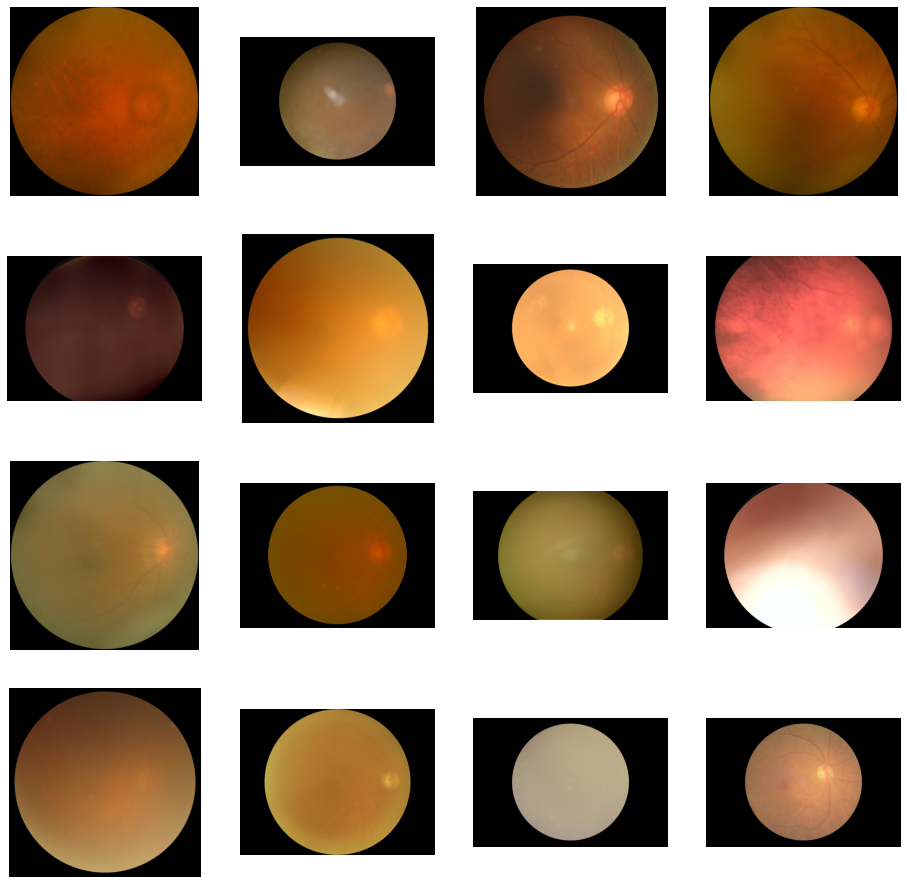

In [39]:
df = data_df.loc[(data_df.cataract==1) & (data_df.right_diagnosys=="cataract")].sample(16).reset_index()
show_images(df,title="Right eye with cataract",eye_exam="right_fundus")

### Left-eye and right-eye glaucom

Left eye with glaucoma; eye exam: left_fundus


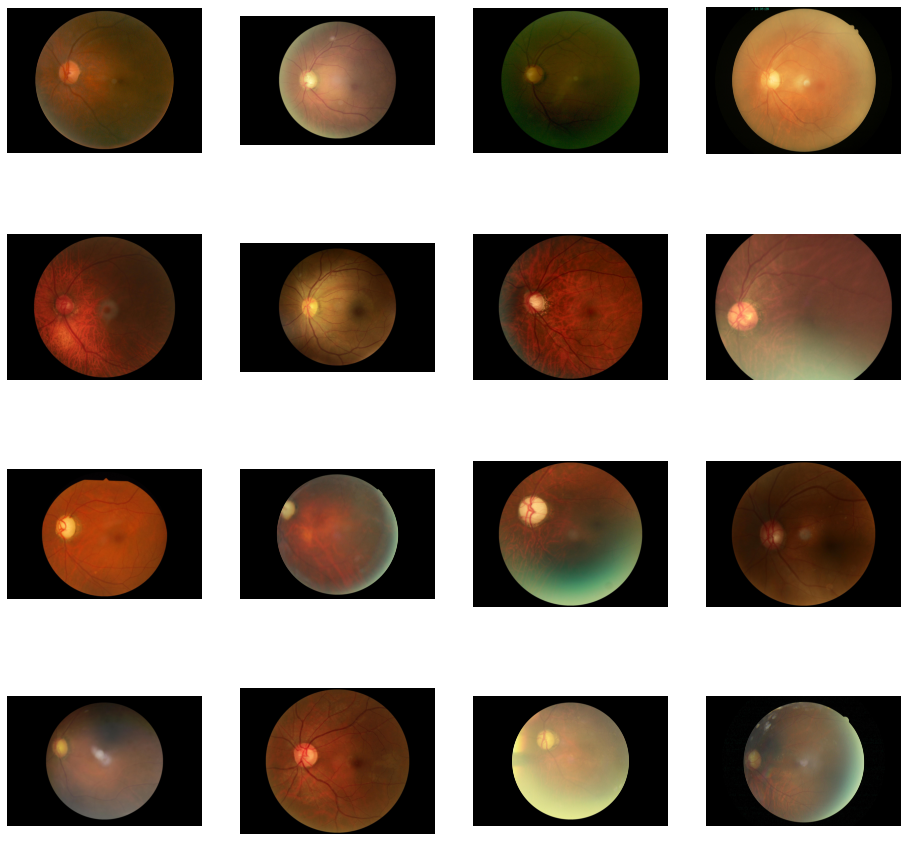

In [40]:
df = data_df.loc[(data_df.glaucoma==1) & (data_df.left_diagnosys=="glaucoma")].sample(16).reset_index()
show_images(df,title="Left eye with glaucoma",eye_exam="left_fundus")

Right eye with glaucoma; eye exam: right_fundus


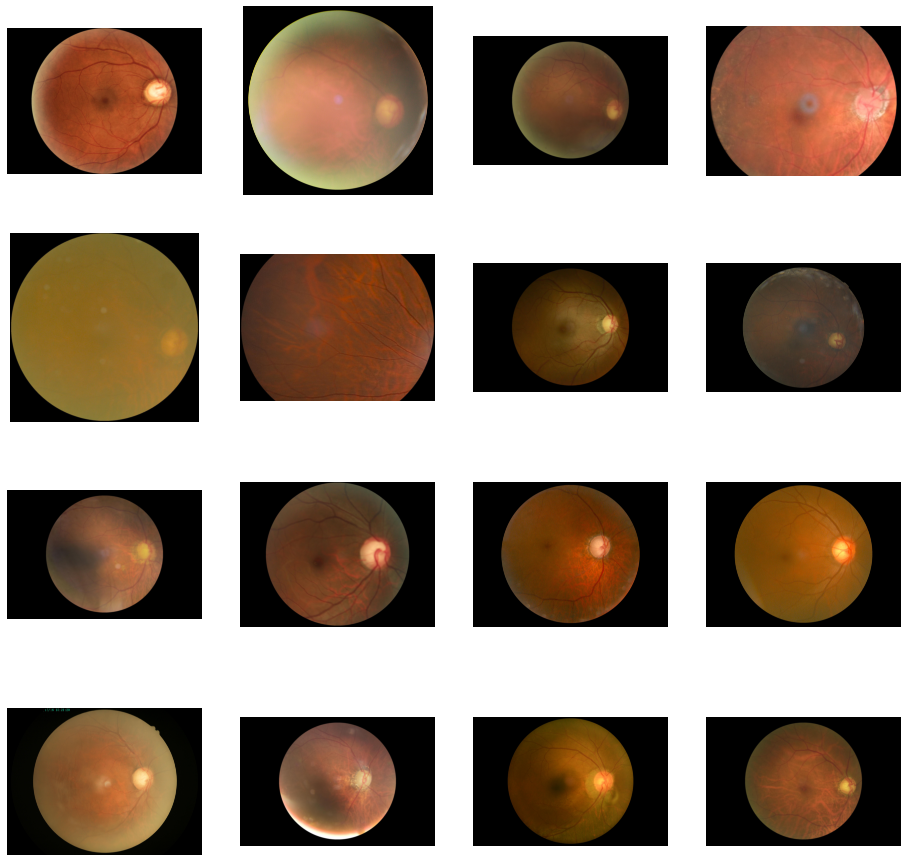

In [41]:
df = data_df.loc[(data_df.glaucoma==1) & (data_df.right_diagnosys=="glaucoma")].sample(16).reset_index()
show_images(df,title="Right eye with glaucoma",eye_exam="right_fundus")

### Left-eye and right-eye myopia

Left eye with myopia; eye exam: left_fundus


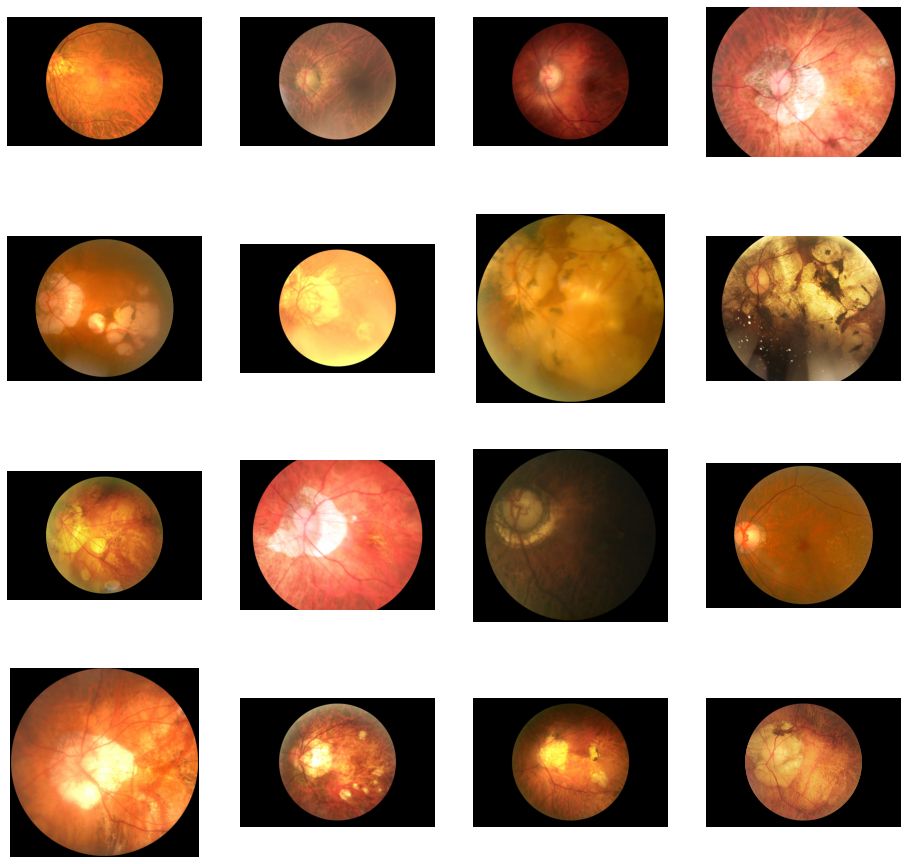

In [42]:
df = data_df.loc[(data_df.myopia==1)].sample(16).reset_index()
show_images(df,title="Left eye with myopia",eye_exam="left_fundus")

Right eye with myopia; eye exam: right_fundus


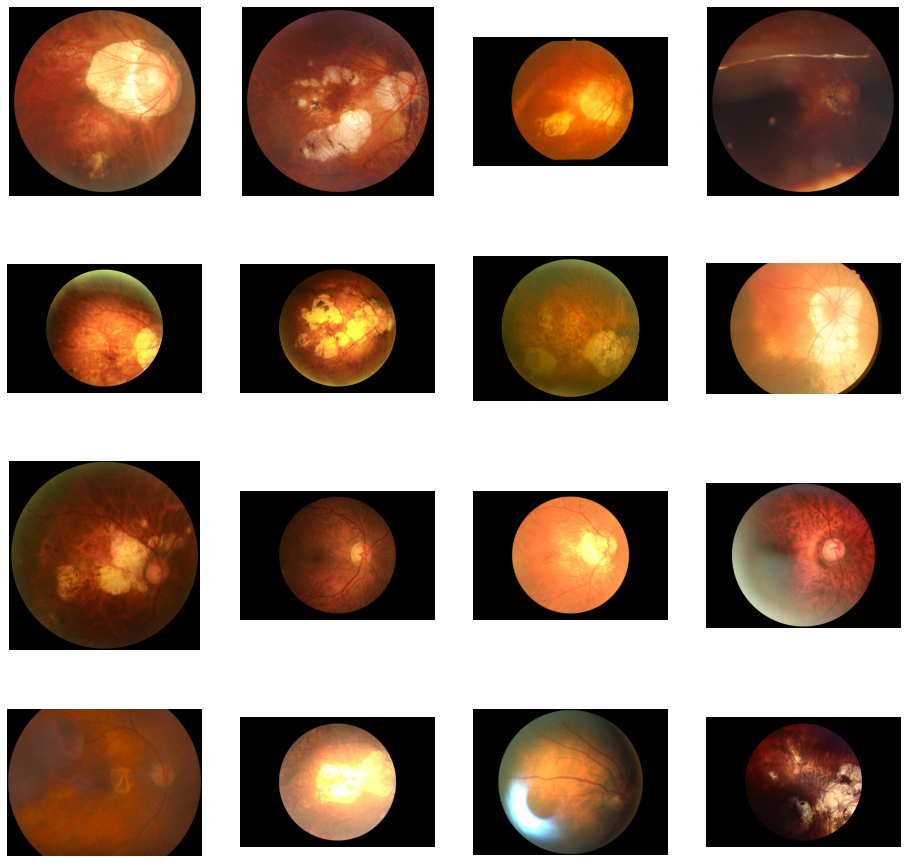

In [43]:
df = data_df.loc[(data_df.myopia==1)].sample(16).reset_index()
show_images(df,title="Right eye with myopia",eye_exam="right_fundus")